<a href="https://colab.research.google.com/github/ayberkcorp/cap5610-machine_learning/blob/master/hw6/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install surprise

     |████████████████████████████████| 11.8MB 8.8MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670920 sha256=fc1725e69cf5113a38b28d1e9570a503d9a3a9ee597c694c80a85f5d6455f31e
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


### Read data from “ratings.csv” with line format: 'userID movieID rating timestamp'.

In [2]:
from google.colab import files
import io
import pandas as pd
from surprise import Reader, Dataset

# Using ratings_small.csv instead
data_to_load = files.upload()
ratings_df = pd.read_csv(io.BytesIO(data_to_load['ratings_small.csv']))

reader = Reader(rating_scale=(1, 5))
ratings_data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

Saving ratings_small.csv to ratings_small.csv


### Compute the average MAE and RMSE of the Probabilistic Matrix Factorization (PMF), User based Collaborative Filtering, Item based Collaborative Filtering, under the 5-folds cross-validation

In [3]:
from surprise import SVD
from surprise.model_selection import cross_validate

algo = SVD(biased=False)
pmf_results = cross_validate(algo, ratings_data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7763  0.7813  0.7819  0.7841  0.7826  0.7812  0.0026  
RMSE (testset)    1.0092  1.0137  1.0135  1.0086  1.0111  1.0112  0.0021  
Fit time          4.29    4.23    4.31    4.27    4.25    4.27    0.03    
Test time         0.17    0.16    0.11    0.10    0.18    0.14    0.03    


In [4]:
from surprise import KNNWithMeans

algo = KNNWithMeans(sim_options={'name': 'MSD', 'user_based': True}, verbose=False)
user_results_msd = cross_validate(algo, ratings_data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Evaluating MAE, RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7079  0.7015  0.7043  0.6996  0.7034  0.7033  0.0028  
RMSE (testset)    0.9246  0.9147  0.9189  0.9166  0.9194  0.9189  0.0033  
Fit time          0.11    0.13    0.13    0.13    0.13    0.13    0.01    
Test time         1.51    1.43    1.50    1.39    1.46    1.46    0.05    


In [5]:
algo_CF_item_msd = KNNWithMeans(sim_options={'name': 'MSD', 'user_based': False}, verbose=False)
item_results_msd = cross_validate(algo, ratings_data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Evaluating MAE, RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7069  0.7040  0.7029  0.6977  0.7091  0.7041  0.0039  
RMSE (testset)    0.9216  0.9219  0.9183  0.9139  0.9259  0.9203  0.0040  
Fit time          0.14    0.13    0.13    0.13    0.13    0.13    0.00    
Test time         1.47    1.44    1.39    1.46    1.48    1.45    0.03    


### Compare the average (mean) performances of User-based collaborative filtering, item-based collaborative filtering, PMF with respect to RMSE and MAE.

In [6]:
from statistics import mean

print('RMSE Performances:')
print('User-based:', mean(user_results_msd['test_rmse']))
print('Item-based:', mean(item_results_msd['test_rmse']))
print('PMF:', mean(pmf_results['test_rmse']))

print('\nMAE Performances:')
print('User-based:', mean(user_results_msd['test_mae']))
print('Item-based:', mean(item_results_msd['test_mae']))
print('PMF:', mean(pmf_results['test_mae']))

RMSE Performances:
User-based: 0.9188594168884612
Item-based: 0.9203077624083134
PMF: 1.0112052852925668

MAE Performances:
User-based: 0.7033390430862964
Item-based: 0.7041332776333441
PMF: 0.7812244248516433


### Examine how the cosine, MSD (Mean Squared Difference), and Pearson similarities impact the performances of User based Collaborative Filtering and Item based Collaborative Filtering.

The MSD performance results for both types of filtering can be found above.

User based:

In [7]:
# cosine
algo = KNNWithMeans(sim_options={'name': 'cosine', 'user_based': True}, verbose=False)
user_results_cosine = cross_validate(algo, ratings_data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Evaluating MAE, RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7074  0.7047  0.7083  0.7008  0.7086  0.7060  0.0029  
RMSE (testset)    0.9210  0.9183  0.9245  0.9121  0.9277  0.9207  0.0054  
Fit time          0.31    0.32    0.32    0.32    0.32    0.32    0.00    
Test time         1.41    1.43    1.50    1.46    1.43    1.45    0.03    


In [8]:
# Pearson
algo = KNNWithMeans(sim_options={'name': 'pearson_baseline', 'user_based': True}, verbose=False)
user_results_pearson = cross_validate(algo, ratings_data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Evaluating MAE, RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.6986  0.6994  0.7022  0.6990  0.7014  0.7001  0.0014  
RMSE (testset)    0.9220  0.9186  0.9258  0.9225  0.9206  0.9219  0.0024  
Fit time          0.44    0.43    0.44    0.44    0.44    0.44    0.00    
Test time         1.31    1.31    1.34    1.36    1.32    1.33    0.02    


Item based:

In [9]:
# cosine
algo = KNNWithMeans(sim_options={'name': 'cosine', 'user_based': False}, verbose=False)
item_results_cosine = cross_validate(algo, ratings_data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Evaluating MAE, RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7067  0.7181  0.7039  0.7122  0.7100  0.7102  0.0049  
RMSE (testset)    0.9246  0.9327  0.9171  0.9313  0.9225  0.9256  0.0057  
Fit time          12.75   12.29   12.08   11.50   11.97   12.12   0.41    
Test time         5.34    5.41    5.25    5.26    5.36    5.33    0.06    


In [10]:
# Pearson
algo = KNNWithMeans(sim_options={'name': 'pearson_baseline', 'user_based': False}, verbose=False)
item_results_pearson = cross_validate(algo, ratings_data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Evaluating MAE, RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.6819  0.6934  0.6873  0.6871  0.6904  0.6880  0.0038  
RMSE (testset)    0.9000  0.9141  0.9049  0.9021  0.9068  0.9056  0.0049  
Fit time          7.54    7.80    7.53    7.39    7.28    7.51    0.18    
Test time         5.59    5.38    5.22    5.30    5.33    5.36    0.12    


### Plot your results.

User based:

[0.02070876625255924, 0.018859416888461156, 0.021878682896850243]


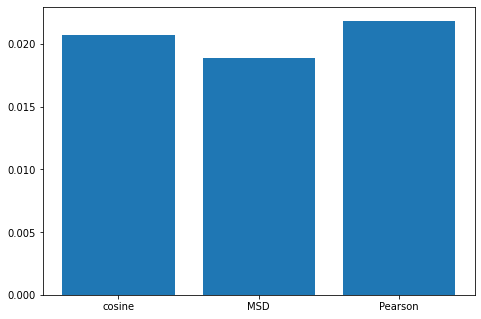

In [11]:
import matplotlib.pyplot as plt

# RMSE comparisons
user_rmse_performance_means = [mean(user_results_cosine['test_rmse'])-0.9, mean(user_results_msd['test_rmse'])-0.9, mean(user_results_pearson['test_rmse'])-0.9];
print(user_rmse_performance_means)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(['cosine', 'MSD', 'Pearson'], user_rmse_performance_means);

[0.10598083189539931, 0.10333904308629638, 0.1001036473478395]


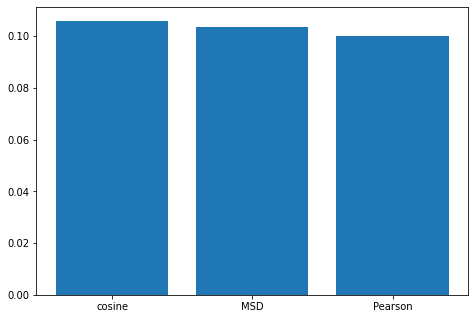

In [12]:
# MAE comparisons
user_mae_performance_means = [mean(user_results_cosine['test_mae'])-0.6, mean(user_results_msd['test_mae'])-0.6, mean(user_results_pearson['test_mae'])-0.6];
print(user_mae_performance_means)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(['cosine', 'MSD', 'Pearson'], user_mae_performance_means);

Item based:

[0.025645583732868737, 0.020307762408313335, 0.00556947369258054]


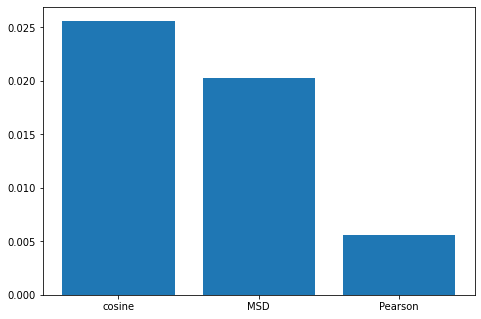

In [13]:
# RMSE comparisons
item_rmse_performance_means = [mean(item_results_cosine['test_rmse'])-0.9, mean(item_results_msd['test_rmse'])-0.9, mean(item_results_pearson['test_rmse'])-0.9];
print(item_rmse_performance_means)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(['cosine', 'MSD', 'Pearson'], item_rmse_performance_means);

[0.11019742375067532, 0.10413327763334412, 0.08801373976662907]


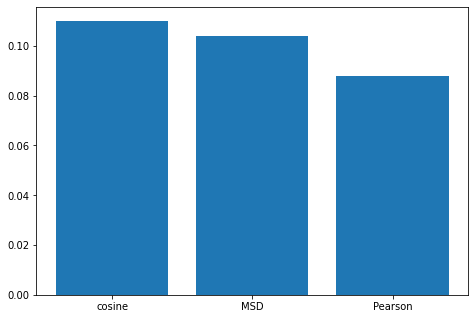

In [14]:
# MAE comparisons
item_mae_performance_means = [mean(item_results_cosine['test_mae'])-0.6, mean(item_results_msd['test_mae'])-0.6, mean(item_results_pearson['test_mae'])-0.6];
print(item_mae_performance_means)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(['cosine', 'MSD', 'Pearson'], item_mae_performance_means);

We can see that the order of performances between the cosine, MSD, and Pearson similarities, in all cases, from best to worst is:

$Pearson > MSD > cosine$,

excluding the case that used the RMSE comparisons for User based Collaborative Filtering, in which the relationship between performances is:

$MSD > cosine > Pearson$.

### Is the impact of the three metrics on User based Collaborative Filtering consistent with the impact of the three metrics on Item based Collaborative Filtering?



### Examine how the number of neighbors impacts the performances of User based Collaborative Filtering and Item based Collaborative Filtering? Plot your results.

User based:

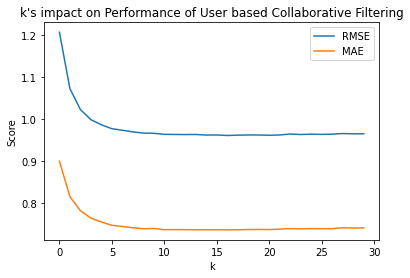

In [15]:
import numpy as np
from surprise import KNNBasic

max_k = 30
user_rmse_k = []
user_mae_k = []
            
for i in range(1, max_k + 1):
  algo = KNNBasic(k=i, sim_options={'name': 'msd', 'user_based': True}, verbose=False)
  user_results_msd = cross_validate(algo, ratings_data, measures=['MAE', 'RMSE'], cv=5)
  user_rmse_k.append(np.average(user_results_msd.get('test_rmse')))
  user_mae_k.append(np.average(user_results_msd.get('test_mae')))

fig = plt.figure()
ax = plt.axes()
k_range = np.arange(0, max_k)
ax.plot(k_range, user_rmse_k, label='RMSE')
ax.plot(k_range, user_mae_k, label='MAE')
plt.title('k\'s impact on Performance of User based Collaborative Filtering')
ax.set_xlabel('k')
ax.set_ylabel('Score')
plt.legend();

Item based:

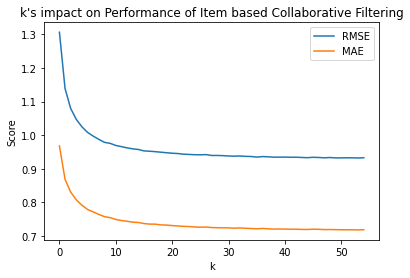

In [16]:
max_k = 55
item_rmse_k = []
item_mae_k = []
            
for i in range(1, max_k + 1):
  algo = KNNBasic(k=i, sim_options={'name': 'msd', 'user_based': False}, verbose=False)
  item_results_msd = cross_validate(algo, ratings_data, measures=['MAE', 'RMSE'], cv=5)
  item_rmse_k.append(np.average(item_results_msd.get('test_rmse')))
  item_mae_k.append(np.average(item_results_msd.get('test_mae')))

fig = plt.figure()
ax = plt.axes()
k_range = np.arange(0, max_k)
ax.plot(k_range, item_rmse_k, label='RMSE')
ax.plot(k_range, item_mae_k, label='MAE')
plt.title('k\'s impact on Performance of Item based Collaborative Filtering')
ax.set_xlabel('k')
ax.set_ylabel('Score')
plt.legend();